In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as basemap
import numpy as np
import pydl.pydlutils.spheregroup as spheregroup
import observesim.sloane as sloane
import observesim.coords as coords
import fitsio
import healpy
import astropy.io.ascii as ascii

Generated by running:

    sdss5_simulate -o straw-apo -t apo

In [8]:
tiles = fitsio.read('straw-apo-tiles.fits')
observations = fitsio.read('straw-apo-observations.fits')

In [9]:
nside = 16
tpix = healpy.pixelfunc.ang2pix(nside, tiles['racen'], tiles['deccen'], lonlat=True)
desired = np.zeros(healpy.nside2npix(nside))
for pix in zip(tpix):
    desired[pix] = desired[pix] + observations['duration'][0]

In [10]:
coverage = np.zeros(healpy.nside2npix(nside))
for tileid, duration in zip(observations['tileid'], observations['duration']):
    coverage[tpix[tileid]] = coverage[tpix[tileid]] + duration

## Coverage

Here we show the resulting coverage. Please keep in mind that the scheduling software is infinitely stupid at this point. In this case it tries to fill in from the South to the North preferentially.

<IPython.core.display.Javascript object>


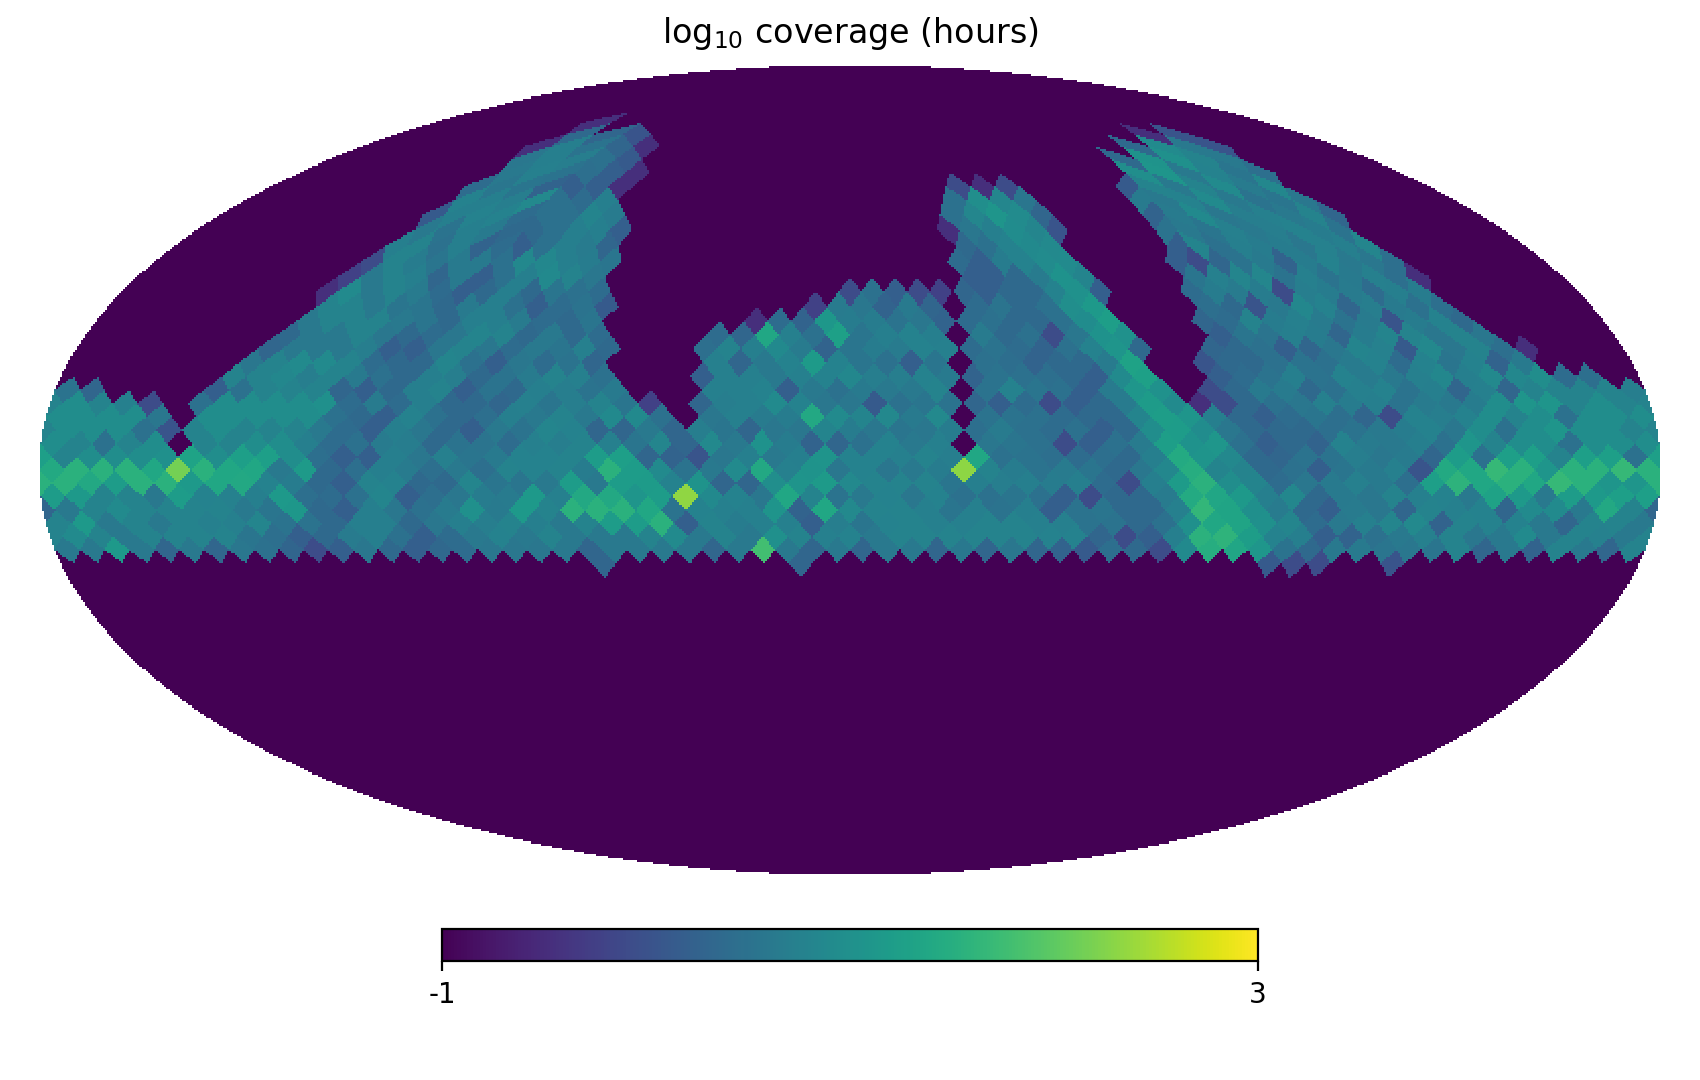

In [11]:
healpy.mollview(np.log10(coverage * 24. + 0.1), title="log$_{10}$ coverage (hours)", min=-1., max=3.)

<IPython.core.display.Javascript object>


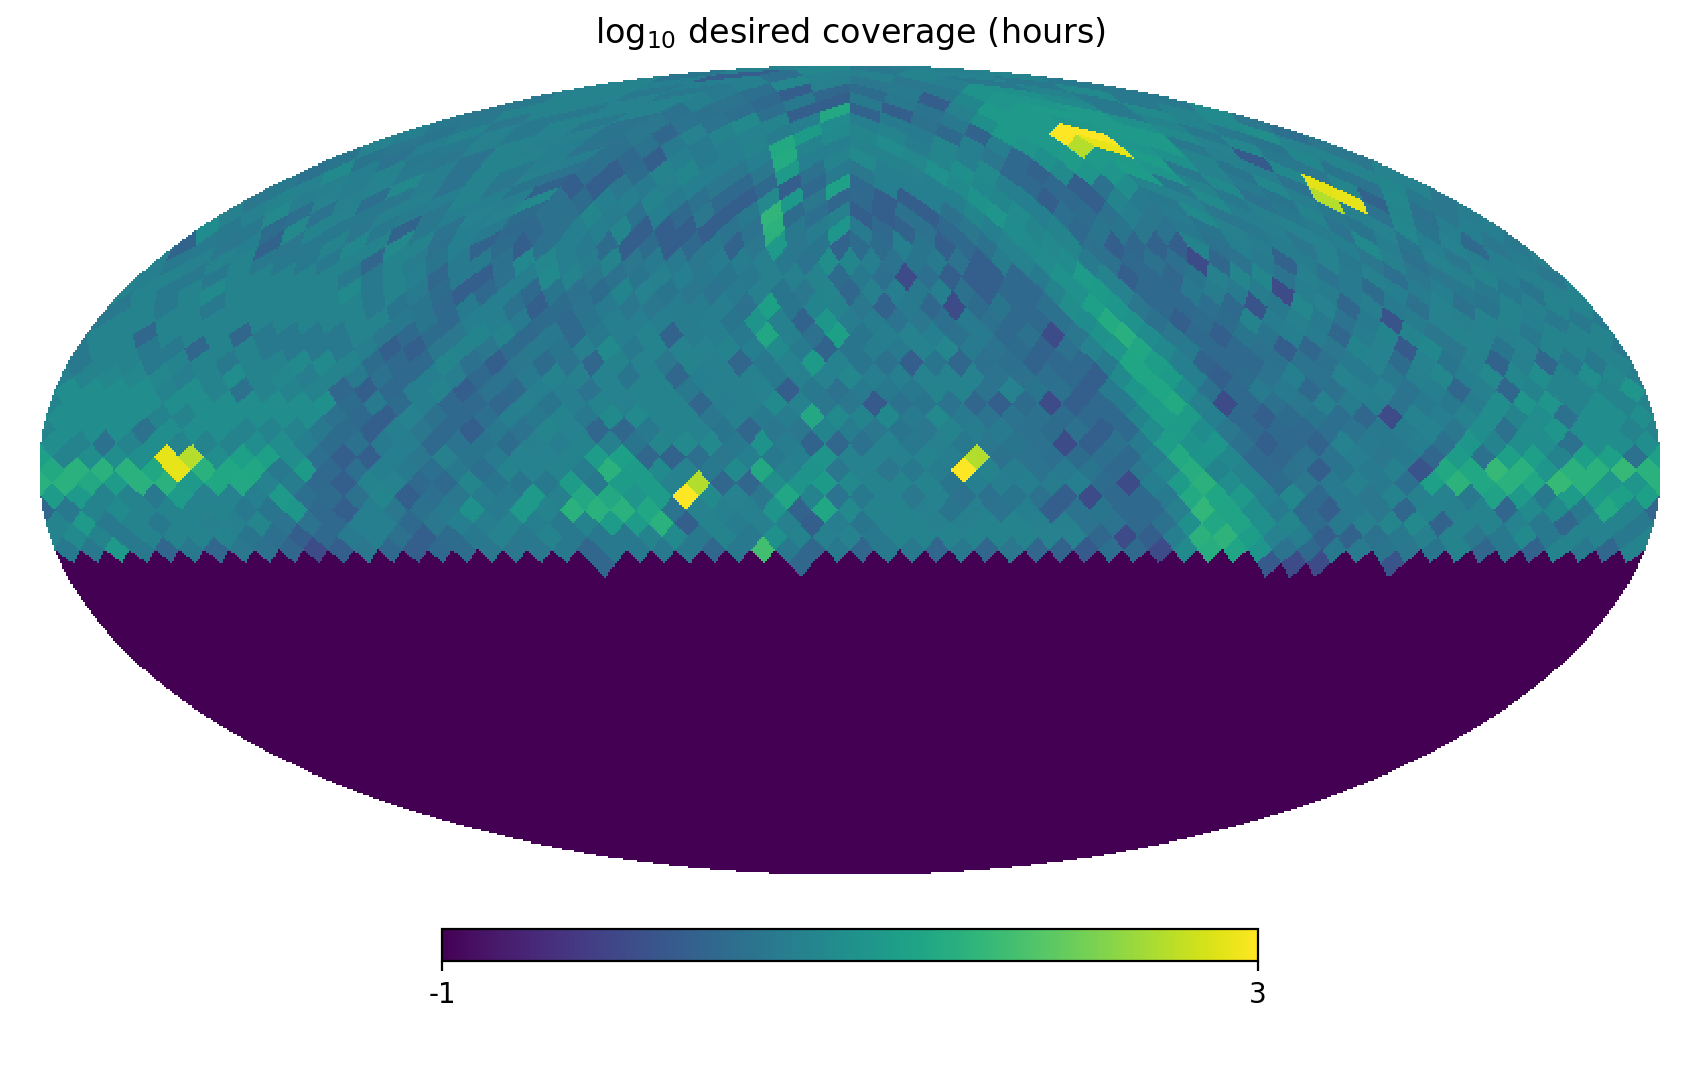

In [12]:
healpy.mollview(np.log10(desired * 24. + 0.1), title="log$_{10}$ desired coverage (hours)", min=-1., max=3)

<IPython.core.display.Javascript object>


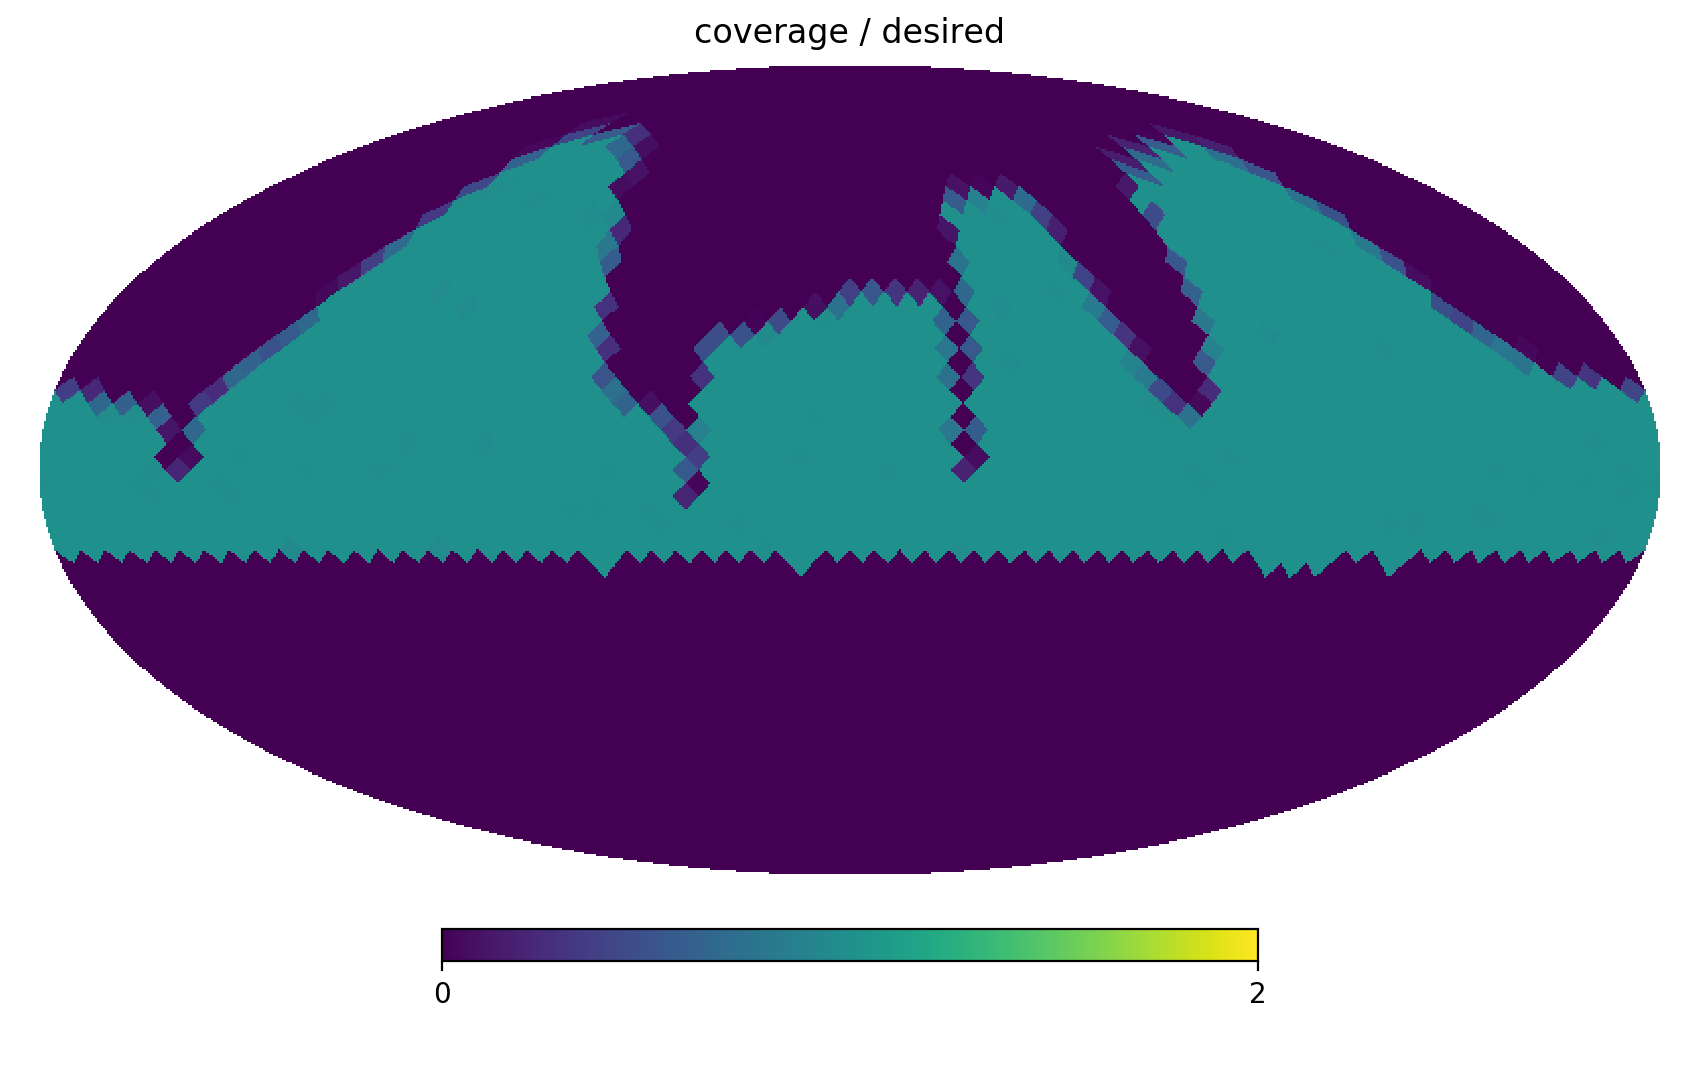

In [14]:
indx = np.where(desired == 0)[0]
odesired = desired[:]
ocoverage = coverage[:]
odesired[indx] = 1.
ocoverage[indx] = 0.
healpy.mollview(ocoverage / odesired, title="coverage / desired", min=0., max=2)